# Building Audio Sample Feature Datasets



In [1]:
import soundcloud
import urllib 
import urllib.request
import os
from pydub import AudioSegment
from pathlib import Path

import urllib.request


# create client with access token
client = soundcloud.Client(client_id='d74966a45a69cd502a72686704fefaab', client_secret='c006777d92bad381ac00244db9997aab')




In [2]:

list_of_tracks = [
    'https://soundcloud.com/freesongstouse/jjd-marin-hoxha-lift'
]

def mkdirs_safe(path):
    try:
        os.makedirs(path) 
    except Exception:
        pass

mkdirs_safe('../data/processed/sc/')
mkdirs_safe('../data/raw/sc/')

list_of_wav_files = []

for track_url in list_of_tracks: 
    # resolve track URL into track resource
    track = client.get('/resolve', url=track_url)
    print('GETTING /tracks/%d'%track.id)
    track = client.get('/tracks/%d'%track.id)
    track_loc = "../data/raw/sc/%d.mp3"%track.id
    
    print(track.stream_url)
    
    track_path = Path(track_loc)
    
    if not track_path.is_file():

        # get the tracks streaming URL
        stream_url = client.get(track.stream_url, allow_redirects=False)
        
        
        print("Loading sound %s %s"%(stream_url.location,track_loc))
        urllib.request.urlretrieve(stream_url.location, track_loc)
        # print the tracks stream URL
        print(track_loc, " is created")
    else:
        print(track_loc, " already existed")
    
    wav_loc = "../data/processed/sc/%d.wav"%track.id
    wav_path = Path(wav_loc)
    
    if not wav_path.is_file():
        print("Processing mp3 to wav")
        sound = AudioSegment.from_mp3(track_loc)
        sound.export(wav_loc, format="wav")
        list_of_wav_files.append(wav_loc)
        print("Processing completed")
    else:
        print("Wav already exists")




GETTING /tracks/324758087
https://api.soundcloud.com/tracks/324758087/stream
Loading sound https://cf-media.sndcdn.com/phAbn2Aes9qE.128.mp3?Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiKjovL2NmLW1lZGlhLnNuZGNkbi5jb20vcGhBYm4yQWVzOXFFLjEyOC5tcDMiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE0OTYwOTMxNzl9fX1dfQ__&Signature=EyAI7auqjnDzPeitprCHTjIGdlQ9dr-EVOgCJOr3pKc3n9fxgqD4MWbNReqkWv~PsVkXr~uke41wDBq10~LIeIz04LnGs-ncrD4heoIrKV4mMpSr-MkuJgOE7Id50xayfPiLInI5vBtPsBZghiHUz-iJtJ1tcKG2uXhvf92933371-k11OqqKPsHnZhp33NswQFlVfBPFkiwXPyU5KWBWtc-1h4Y98wPD6aC0tf5ZWGjtdxn1mWFK7WuitvHgg2p53g6kVJzvRWNsv-Sv4ANRoBVUIesOD1y4ZCIh3OQBsjq2h4Ntjv969hLTlCG94QanJIzbXOjh8lm9ODlaJn82A__&Key-Pair-Id=APKAJAGZ7VMH2PFPW6UQ ../data/raw/sc/324758087.mp3
../data/raw/sc/324758087.mp3  is created
Processing mp3 to wav
Processing completed


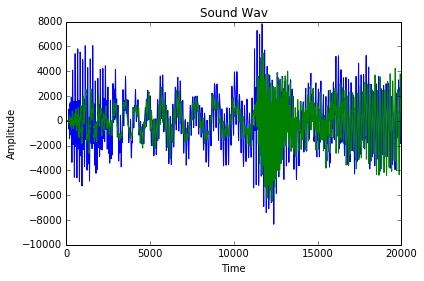

In [3]:
import wave
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
%matplotlib inline 

# read audio samples
input_data = read(list_of_wav_files[0])
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:20000])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sound Wav")
# display the plot
plt.show()

In [9]:
%cd ../
# We'll need numpy for some mathematical operations
import numpy as np


# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline


# and IPython.display for audio output
import IPython.display


# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

/Users/kthakore/Documents/musigan


Loading to LibROSA ../data/processed/sc/324758087.wav


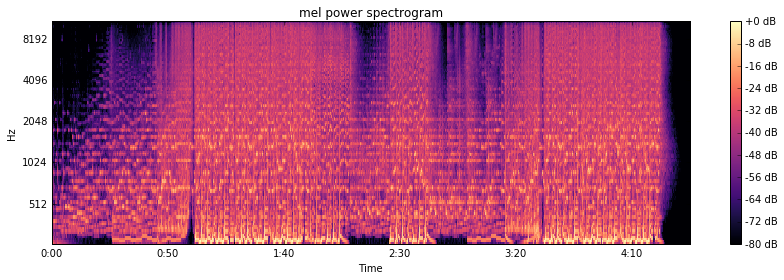

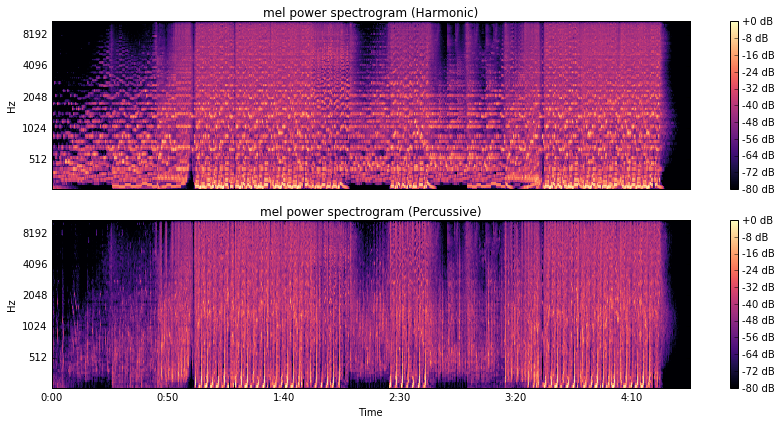

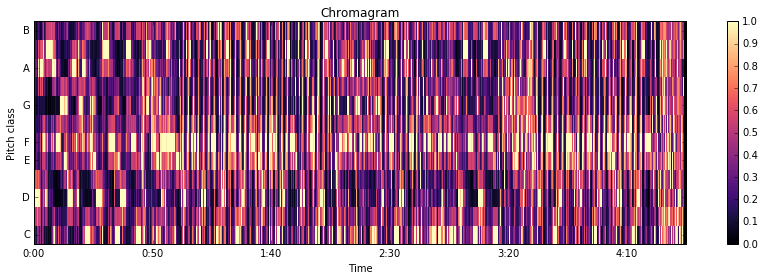

In [25]:
print("Loading to LibROSA %s"%list_of_wav_files[0])
y, sr = librosa.load(list_of_wav_files[0])

S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

log_S.shape

y_harmonic, y_percussive = librosa.effects.hpss(y)
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.logamplitude(S_harmonic, ref_power=np.max)
log_Sp = librosa.logamplitude(S_percussive, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()


Estimated tempo:        117.45 BPM
First 5 beat frames:    [ 23  44  66  87 108]
First 5 beat times:     [ 0.53405896  1.021678    1.53251701  2.02013605  2.5077551 ]


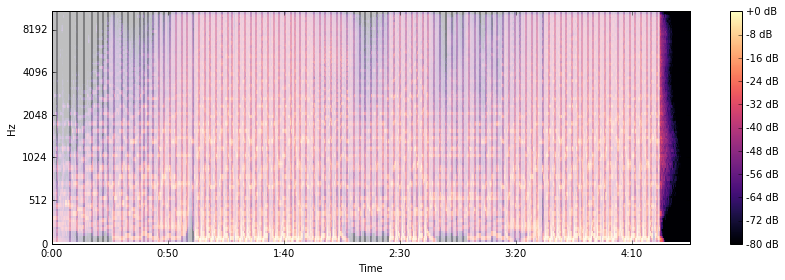

In [26]:

# Now, let's run the beat tracker.
# We'll use the percussive component for this part
plt.figure(figsize=(12, 6))
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

# Let's re-draw the spectrogram, but this time, overlay the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Let's draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.5)

plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()


print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))

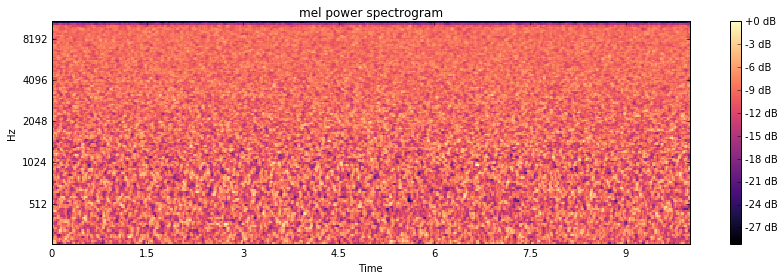

In [27]:
y, sr = librosa.load('data/processed/rand_sample.wav')
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

Estimated tempo:        117.45 BPM
First 5 beat frames:    [ 23  44  66  87 108]
First 5 beat times:     [ 0.53405896  1.021678    1.53251701  2.02013605  2.5077551 ]
Estimated tempo:        117.45 BPM
First 5 beat frames:    [ 23  44  66  87 108]
First 5 beat times:     [ 0.53405896  1.021678    1.53251701  2.02013605  2.5077551 ]


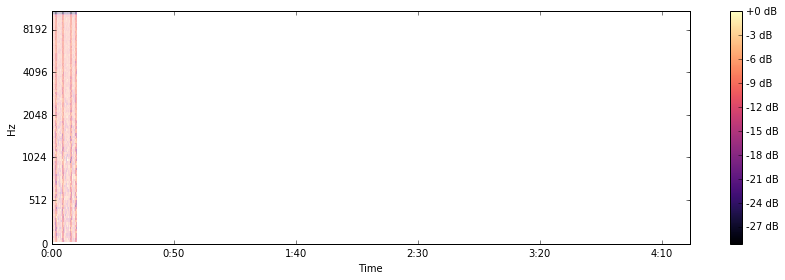

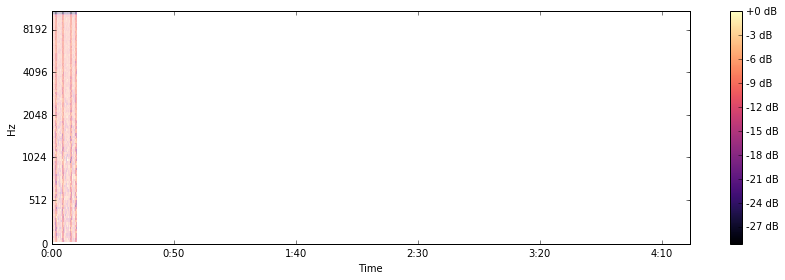

In [28]:

# Now, let's run the beat tracker.
# We'll use the percussive component for this part
plt.figure(figsize=(12, 6))
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

# Let's re-draw the spectrogram, but this time, overlay the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Let's draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.5)

plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()


print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))
# Now, let's run the beat tracker.
# We'll use the percussive component for this part
plt.figure(figsize=(12, 6))
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

# Let's re-draw the spectrogram, but this time, overlay the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Let's draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.5)

plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()


print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))